In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# import custom functions

from custom_functions import get_data_summary, our_metrics, eval_metrics, evaluate_model


import warnings
warnings.filterwarnings('ignore')

##  try to initiate  logistic regression model without scale 

In [2]:
po=pd.read_csv('data/y_train.csv')
po.shape

(3357518, 1)

In [3]:
ko=pd.read_csv('data/y_test.csv')
ko.shape

(1119173, 1)

In [10]:
# Modelling by initiallion of instance 
#
logistic_regression = LogisticRegression()
logistic_regression.fit( pd.read_csv('data/X_train.csv'), pd.read_csv('data/y_train.csv'))
y_pred = logistic_regression.predict(pd.read_csv('data/X_test.csv'))

Accuracy: 0.9209
_____________________
F1-score: 0.0004
_____________________
Fbeta_score with beta=1.5: 0.0003
_____________________
Fbeta_score with beta=2: 0.0003
_____________________
Fbeta_score with beta=3: 0.0002
_____________________
Recall 0.0002
_____________________
Specificity 0.9998


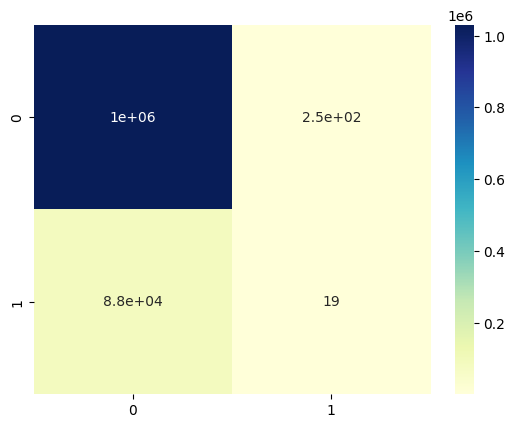

In [11]:
our_metrics(pd.read_csv('data/y_test.csv'),y_pred)

##  try to initiate  logistic regression model with scale 

In [18]:
# Modelling by initiallion of instance 
#
logistic_regression = LogisticRegression()
logistic_regression.fit( pd.read_csv('data/X_train_minmax.csv'), pd.read_csv('data/y_train.csv'))
y_pred_minmax= logistic_regression.predict(pd.read_csv('data/X_test_minmax.csv'))
#y_pred_minmax= logistic_regression.predict(pd.read_csv('data/X_test.csv'))

Accuracy: 0.9212
_____________________
F1-score: 0.0087
_____________________
Fbeta_score with beta=1.5: 0.0063
_____________________
Fbeta_score with beta=2: 0.0055
_____________________
Fbeta_score with beta=3: 0.0049
_____________________
Recall 0.0044
_____________________
Specificity 0.9997


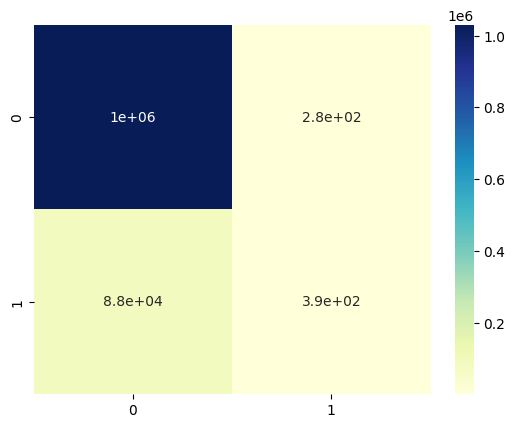

In [20]:
our_metrics(pd.read_csv('data/y_test.csv'),y_pred_minmax)

In [19]:
logistic_regression = LogisticRegression()
logistic_regression.fit( pd.read_csv('data/X_train_std.csv'), pd.read_csv('data/y_train.csv'))
y_pred_stan= logistic_regression.predict(pd.read_csv('data/X_test_std.csv'))

Accuracy: 0.9212
_____________________
F1-score: 0.0089
_____________________
Fbeta_score with beta=1.5: 0.0065
_____________________
Fbeta_score with beta=2: 0.0056
_____________________
Fbeta_score with beta=3: 0.005
_____________________
Recall 0.0045
_____________________
Specificity 0.9996


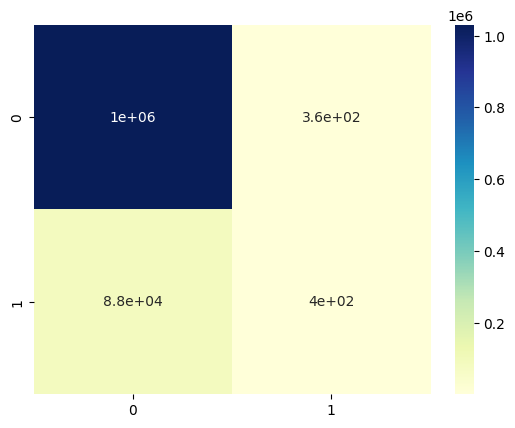

In [21]:
our_metrics(pd.read_csv('data/y_test.csv'),y_pred_stan)

## use new database 18  to implement to initiate  logistic regression model without scale 

In [7]:
# Modelling by initiallion of instance 

logistic_regression = LogisticRegression()
logistic_regression.fit( pd.read_csv('data/X_train.csv'), pd.read_csv('data/y_train.csv'))
y_pred_1= logistic_regression.predict(pd.read_csv('data/X_test.csv'))

Accuracy: 0.9209
_____________________
F1-score: 0.0008
_____________________
Fbeta_score with beta=1.5: 0.0006
_____________________
Fbeta_score with beta=2: 0.0005
_____________________
Fbeta_score with beta=3: 0.0004
_____________________
Recall 0.0004
_____________________
Specificity 0.9998


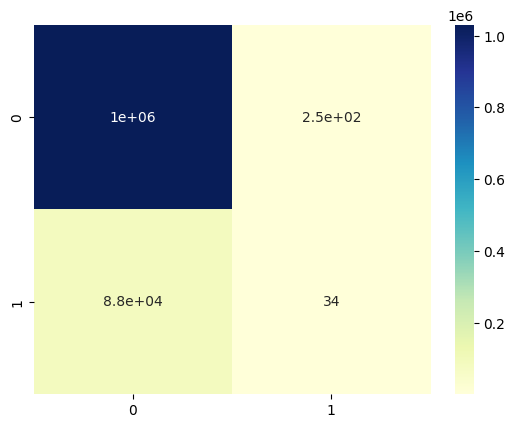

In [8]:
our_metrics(pd.read_csv('data/y_test.csv'),y_pred_1)

In [12]:
pd.read_csv('data/y_test.csv').shape

(1119173, 1)

In [ ]:
# Defining parameter grid (as dictionary)
param_grid = {"loss" : ["hinge", "log", "squared_hinge", "modified_huber"], #this actually defines the model you use
              "alpha" : [0.0001, 0.001, 0.01, 0.1],
              "penalty" : ["l2", "l1", "none"]
             }

# Instantiate gridsearch and define the metric to optimize 
gs = GridSearchCV(SGDClassifier(random_state=RSEED), param_grid, scoring='accuracy',
                  cv=5, verbose=5, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes
start = timer()
gs.fit(X_train_preprocessed, y_train)
end = timer()
gs_time = end-start

## Hyperparametre with ra

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()

random_search = RandomizedSearchCV(
    model, param_grid, n_iter=10, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search.fit(X, y)

best_model = random_search.best_estimator_
best_hyperparameters = random_search.best_params_


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # regularization penalty ('l1' or 'l2')
    'C': [0.1, 1.0, 10.0]     # inverse of regularization strength
}

# Create the logistic regression model
logreg = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Fit the model using GridSearchCV
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


In [ ]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
# grid search logistic regression model on the sonar dataset
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
# define search
search = GridSearchCV(model, space, scoring='accuracy', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)